【例11-1】对iris数据集中花萼宽度与长度进行一元线性回归分析。

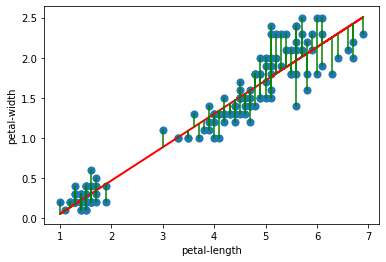

系数: [[0.41575542]]
截距: [-0.36307552]
预测值为: [[1.2583706]]


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris 
from sklearn.linear_model import LinearRegression
%matplotlib inline
iris = load_iris()   #导入数据集iris
data=pd.DataFrame(iris.data)
data.columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
# 使用sklearn完成一元线性回归
x = data['petal-length'].values
y = data['petal-width'].values
x = x.reshape(len(x),1)
y = y.reshape(len(y),1)
clf = LinearRegression()
clf.fit(x,y)
pre = clf.predict(x)
plt.scatter(x,y,s=50)
plt.plot(x,pre,'r-',linewidth=2)
plt.xlabel('petal-length')
plt.ylabel('petal-width')
for idx, m in enumerate(x):  
    plt.plot([m,m],[y[idx],pre[idx]], 'g-')  
plt.show()
print(u"系数:", clf.coef_  )
print(u"截距:", clf.intercept_  )
# 对花萼长度为3.9的花，预测其花萼宽度。
print('预测值为:',clf.predict([[3.9]]) )

【例11-2】对iris数据集进行逻辑回归分析。

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
X = load_iris().data
y = load_iris().target
# 划分训练集和测试集，并对数据进行I标准化
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# 训练逻辑回归模型并对测试集进行预测
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
#用LogisticRegression自带的score获得模型在测试集上的准确性
print('Accuracy of LR Classifier:%.3f'%classifier.score(X_test,y_test))

Accuracy of LR Classifier:0.816


.【例11-3】利用决策树算法对Iris数据构建决策树。

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz  #提前安装
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
dot_file = 'tree.dot'
tree.export_graphviz(clf, out_file = dot_file)
with open("result\\tree.dot", 'w') as f:
    f=export_graphviz(clf, out_file = f,feature_names = ['SL','SW','PL','PW'])
# 需要下载graphviz

ModuleNotFoundError: No module named 'graphviz'

In [1]:
import sklearn
from sklearn.datasets import load_iris
import pandas as pd
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
dot_file = 'tree.dot'
tree.export_graphviz(clf, out_file = dot_file)
with open("tree.dot", 'w') as f:
    f = export_graphviz(clf, out_file = None,feature_names = ['SL','SW','PL','PW'])
    out = graphviz.Source(f)
    out.render(r'result1\iris') #使用garphviz将决策树转存PDF存放到桌面，文件名叫iris
    


ModuleNotFoundError: No module named 'graphviz'

In [ ]:
from sklearn import tree #导入决策树
from sklearn.datasets import load_iris #导入datasets创建数组
import graphviz #导入决策树可视化模块

iris = load_iris()
iris_data=iris.data #选择训练数组
iris_target=iris.target #选择对应标签数组

clf = tree.DecisionTreeClassifier() #创建决策树模型
clf=clf.fit(iris_data,iris_target) #拟合模型

dot_data = tree.export_graphviz(clf, out_file=None) #以DOT格式导出决策树
graph = graphviz.Source(dot_data) 
graph.render(r'result\iris') #使用garphviz将决策树转存PDF存放到桌面，文件名叫iris

【例11-4】利用KNN对iris数据集分类。

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,:2]
Y = iris.target
print(iris.feature_names)
cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])
clf = KNeighborsClassifier(n_neighbors = 10,weights = 'uniform')
clf.fit(X,Y)
#画出决策边界
x_min,x_max = X[:,0].min()-1,X[:,0].max()+1
y_min,y_max = X[:,1].min()-1,X[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),
np.arange(y_min,y_max,0.02))
Z = clf.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap = cmap_light)
#绘制预测结果图
plt.scatter(X[:,0],X[:,1],c = Y,cmap = cmap_bold)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('3_Class(k = 10,weights = uniform)')
plt.show()


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<Figure size 640x480 with 1 Axes>

【例11-5】利用SVM对iris数据集分类。

In [3]:
import numpy as np
from sklearn import svm
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
import matplotlib.pyplot as plt
iris = datasets.load_iris()
x, y = iris.data,iris.target
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, random_state = 1, test_size = 0.2)
classifier=svm.SVC(kernel='linear',gamma=0.1,decision_function_shape='ovo',C=0.1)
classifier.fit(x_train, y_train.ravel())
print("SVM-输出训练集的准确率为：", classifier.score(x_train, y_train))
print("SVM-输出测试集的准确率为：", classifier.score(x_test, y_test))
y_hat = classifier.predict(x_test)
classreport = metrics.classification_report(y_test,y_hat)
print(classreport)


SVM-输出训练集的准确率为： 0.975
SVM-输出测试集的准确率为： 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



【例11-6】对iris数据集进行朴素贝叶斯分类。

In [4]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
iris = load_iris()
clf = GaussianNB()#设置分类器
clf.fit(iris.data,iris.target)#训练分类器
y_pred = clf.predict(iris.data)#预测
print("Number of mislabeled points out of %d points:%d" %(iris.data.shape[0],(iris.target != y_pred).sum()))


Number of mislabeled points out of 150 points:6


【例11-7】sklearn实现iris数据K-Means聚类。

In [5]:
from sklearn.datasets import load_iris  
from sklearn.cluster import KMeans  
iris = load_iris()    
#加载数据集
X = iris.data  
estimator = KMeans(n_clusters = 3)    
#构造K-Means聚类模型
estimator.fit(X)                                   
#数据导入模型进行训练
label_pred = estimator.labels_            
#获取聚类标签
print(label_pred)
#显示各个样本所属的类别标签


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


【例11-8】Python层次聚类实现。

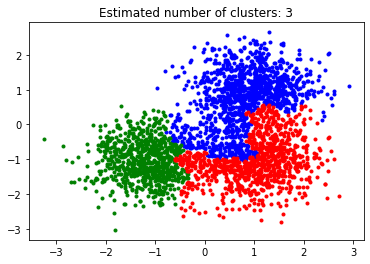

In [6]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle  #python自带的迭代器模块
#产生随机数据的中心
centers = [[1, 1], [-1, -1], [1, -1]]
#产生的数据个数
n_samples = 3000
#生产数据
X, lables_true = make_blobs(n_samples = n_samples, centers= centers, cluster_std = 0.6,random_state = 0)
#设置分层聚类函数
linkages = ['ward', 'average', 'complete']
n_clusters_ = 3
ac = AgglomerativeClustering(linkage = linkages[2],n_clusters = n_clusters_)
#训练数据
ac.fit(X)
#每个数据的分类
lables = ac.labels_
plt.figure(1)  #绘图
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    #根据lables中的值是否等于k，重新组成一个True、False的数组
    my_members = lables == k
    #X[my_members, 0]取出my_members对应位置为True的值的横坐标
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


【例11-9】DBSCAN算法实现。

In [ ]:
from sklearn import datasets
import numpy as np
import random
import matplotlib.pyplot as plt
def findNeighbor(j,X,eps):
    N = []
    for p in range(X.shape[0]):   #找到所有邻域内对象
        temp = np.sqrt(np.sum(np.square(X[j]-X[p])))   #欧氏距离
        if(temp<=eps):
            N.append(p)
    return N
def dbscan(X,eps,min_Pts):
    k = -1
    NeighborPts = []      #array,某点领域内的对象
    Ner_NeighborPts = []
    fil = []                #初始时已访问对象列表为空
    gama = [x for x in range(len(X))] #初始时将所有点标记为未访问
    cluster = [-1 for y in range(len(X))]
    while len(gama)>0:
        j = random.choice(gama)
        gama.remove(j)  #未访问列表中移除
        fil.append(j)   #添加入访问列表
        NeighborPts = findNeighbor(j,X,eps)
        if len(NeighborPts) < min_Pts:
            cluster[j] = -1   #标记为噪声点
        else:
            k = k+1
            cluster[j] = k
            for i in NeighborPts:
                if i not in fil:
                    gama.remove(i)
                    fil.append(i)
                    Ner_NeighborPts=findNeighbor(i,X,eps)
                    if len(Ner_NeighborPts) >= min_Pts:
                        for a in Ner_NeighborPts:
                            if a not in NeighborPts:
                                NeighborPts.append(a)
                    if (cluster[i]==-1):
                        cluster[i]=k
    return cluster
X1, y1 = datasets.make_circles(n_samples=1000, factor=.6,noise=.05)
X2, y2 = datasets.make_blobs(n_samples = 300, n_features = 2, centers = [[1.2,1.2]], cluster_std = [[.1]],random_state = 9)
X = np.concatenate((X1, X2))
eps = 0.08
min_Pts = 10
C = dbscan(X,eps,min_Pts)
plt.figure(figsize = (12, 9), dpi = 80)
plt.scatter(X[:,0],X[:,1],c = C)
plt.show()


【例11-10】sklearn实现实现鸢尾花数据进行降维，将原来4维的数据降维为2维。

In [7]:
import matplotlib.pyplot as plt                 
from sklearn.decomposition import PCA          
from sklearn.datasets import load_iris
data = load_iris()
y = data.target
x = data.data
pca = PCA(n_components = 2)     
#加载PCA算法，设置降维后主成分数目为2
reduced_x = pca.fit_transform(x)   #对样本进行降维
reduced_x


array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

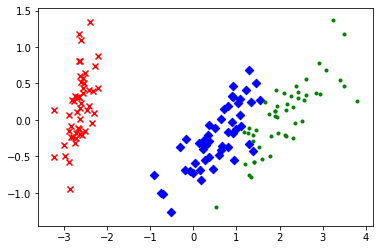

In [8]:
red_x,red_y = [],[]
blue_x,blue_y = [],[]
green_x,green_y = [],[]
for i in range(len(reduced_x)):
    if y[i] ==0:
        red_x.append(reduced_x[i][0])
        red_y.append(reduced_x[i][1])
    elif y[i]==1:
        blue_x.append(reduced_x[i][0])
        blue_y.append(reduced_x[i][1])
    else:
        green_x.append(reduced_x[i][0])
        green_y.append(reduced_x[i][1])
plt.scatter(red_x,red_y,c='r',marker='x')
plt.scatter(blue_x,blue_y,c='b',marker='D')
plt.scatter(green_x,green_y,c='g',marker='.')
plt.show()
